https://thinkinfi.com/fasttext-word-embeddings-python-implementation/#:~:text=FastText%20(an%20extension%20of%20word2vec,still%20shared%20with%20other%20words.

In [ ]:
#https://thinkinfi.com/fasttext-word-embeddings-python-implementation/#:~:text=FastText%20(an%20extension%20of%20word2vec,still%20shared%20with%20other%20words.

In [ ]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
 
import nltk
en_stop = set(nltk.corpus.stopwords.words('english'))
 
from gensim.models.fasttext import FastText
 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
 
# Lemmatization
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_tip.json
# Read yelp review tip dataset
yelp_df = pd.read_json("/content/drive/MyDrive/MSc DS_NLP/yelp_academic_dataset_tip.json", lines=True)
 
print('List of all columns')
print(list(yelp_df))
 
# Checking for missing values in our dataframe
# No there is no missing value
yelp_df.isnull().sum()

List of all columns
['user_id', 'business_id', 'text', 'date', 'compliment_count']


user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [ ]:
# Subset data for gensim fastText model
all_sent = list(yelp_df['text'])
some_sent = all_sent[0:10000]
some_sent[0:10]

['Avengers time with the ladies.',
 'They have lots of good deserts and tasty cuban sandwiches',
 "It's open even when you think it isn't",
 'Very decent fried chicken',
 'Appetizers.. platter special for lunch',
 'Chili Cup + Single Cheeseburger with onion, pickle, and relish + Vanilla Coca-Cola...so far.',
 "Saturday, Dec 7th 2013, ride Patco's Silver Sleigh w/ Santa & his elves on a decorated train into Center City. Trains leave from Lindenwold at 10am, 11:15am, & 12:30pm, and make all stops. Great for kids!",
 'This is probably the best place in the cool Springs area to watch a game and eat',
 'Tacos',
 'Starbucks substitute in boring downtown Tampa. Ugh. Never again!']

In [ ]:
# Text cleaning function for gensim fastText word embeddings in python
def process_text(document):
     
            # Remove extra white space from text
        document = re.sub(r'\s+', ' ', document, flags=re.I)
         
        # Remove all the special characters from text
        document = re.sub(r'\W', ' ', str(document))
 
        # Remove all single characters from text
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
 
        # Converting to Lowercase
        document = document.lower()
 
        # Word tokenization       
        tokens = document.split()
        # Lemmatization using NLTK
        lemma_txt = [stemmer.lemmatize(word) for word in tokens]
        # Remove stop words
        lemma_no_stop_txt = [word for word in lemma_txt if word not in en_stop]
        # Drop words 
        tokens = [word for word in tokens if len(word) > 3]
                 
        clean_txt = ' '.join(lemma_no_stop_txt)
 
        return clean_txt

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
clean_corpus = [process_text(sentence) for sentence in tqdm(some_sent) if sentence.strip() !='']
 
word_tokenizer = nltk.WordPunctTokenizer()
word_tokens = [word_tokenizer.tokenize(sent) for sent in tqdm(clean_corpus)]
word_tokens

In [ ]:
# Defining values for parameters
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2
 
fast_Text_model = FastText(word_tokens,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 4,
                      sg=1,
                      iter=100)


In [ ]:
from gensim.models import Word2Vec
# Save fastText gensim model
fast_Text_model.save("ft_model_yelp")
# Load saved gensim fastText model
fast_Text_model = Word2Vec.load("ft_model_yelp")

In [ ]:
# Check word embedding for a perticular word
fast_Text_model.wv['chicken']

In [ ]:
# Dimention must be 300
fast_Text_model.wv['chicken'].shape

(300,)

In [ ]:
# Check top 10 similar word for a given word by gensim fastText
fast_Text_model.wv.most_similar('chicken', topn=10)

In [ ]:
# Check top 10 similarity score between two word
fast_Text_model.wv.similarity('beer', 'drink')

0.18183364

In [ ]:
# Most opposite to a word
fast_Text_model.wv.most_similar(negative=["chicken"], topn=10)

[('front', 0.06045536696910858),
 ('evening', 0.03132897615432739),
 ('suck', 0.02852560579776764),
 ('history', 0.017374549061059952),
 ('dining', 0.016737308353185654),
 ('1st', 0.009468814358115196),
 ('glass', -0.006207071244716644),
 ('trip', -0.009253252297639847),
 ('beautiful', -0.009303579106926918),
 ('fountain', -0.009620137512683868)]

In [ ]:
# tsne plot for below word
# for_word = 'food'
def tsne_plot(for_word, w2v_model):
    # trained fastText model dimention
    dim_size = w2v_model.wv.vectors.shape[1]
 
    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']
 
    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)
 
    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)
 
    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
 
    #---------------------- Apply PCA and tsne to reduce dimention --------------
 
    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)
 
    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)
 
    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})
 
    #------------------------- tsne plot Python -----------------------------------
 
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )
 
    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)
 
 
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
 
    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


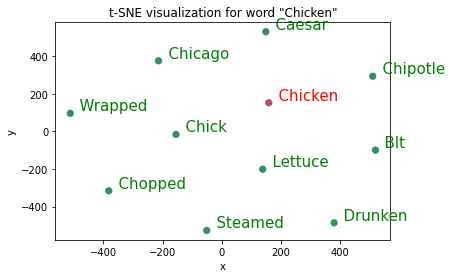

In [ ]:
# tsne plot for top 10 similar word to 'chicken'
tsne_plot(for_word='chicken', w2v_model=fast_Text_model)

In [ ]:
new_data = [['yes', 'this', 'is', 'the', 'word2vec', 'model'],[ 'if',"you","have","think","about","it"]]
 
# Update trained gensim fastText model
fast_Text_model.build_vocab(new_data, update = True)
 
# Update gensim fastText model using new data
new_model = fast_Text_model.train(new_data, total_examples=fast_Text_model.corpus_count, epochs=fast_Text_model.iter)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys


In [ ]:
# Load pretrained fastText word embeddings python with gensim
from gensim.models.fasttext import load_facebook_model
pretrained_fastText_en = load_facebook_model('pretrined fastText model/cc.en.300.bin.gz')
